Podemos volver a utilizar el mismo codigo que para el flujo en una cavidad.

La unica diferencia es que se agrega un termino fuente al campo de velocidades $u$. Las ecuaciones de N-S son entonces

\begin{equation}
\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right) + F_{i,j},
\end{equation}

\begin{equation}
\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} = -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right),
\end{equation}

\begin{equation}
- \frac{1}{\rho} \left( \frac{\partial^2 P}{\partial x^2} + \frac{\partial^2 P}{\partial y^2}\right) = \left( \frac{\partial u}{\partial x} \right)^2 + 2\left( \frac{\partial u}{\partial y} \right)\left( \frac{\partial v}{\partial x} \right) + \left( \frac{\partial v}{\partial x} \right)^2.
\end{equation}

Las discretizaciones son las mismas que en el flujo de una cavidad, pero es este caso para el campo $u$ es

\begin{equation}
\begin{split}
& \frac{u_{i,j}^{n+1}-u_{i,j}^{n}}{\Delta t}+u_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta x}+v_{i,j}^{n}\frac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta y} = \\ 
& \qquad -\frac{1}{\rho}\frac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta x}+\nu\left(\frac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta x^2}+\frac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta y^2}\right) + F^{n}_{i,j}.
\end{split}
\end{equation}

Como ejemplo usamos las codiciones iniciales

$u, v, p$ periodicas en $x = 0, 2$

$u, v = 0$ en $y = 0, 2$
$\partial p / \partial y = 0$ en $y = 0, 2$

$F = 1$ en todos lados

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [0]:
nx = 41
ny = 41
dt = 0.01
paro = 100
Lx = 2.0
Ly = 2.0
dx = Lx / (nx - 1)
dy = Ly / (ny - 1)
x = np.linspace(0,Lx,nx)
y = np.linspace(0,Ly,ny)
X, Y = np.meshgrid(x,y)

F = 1.0
rho = 1.0
nu = 0.1

def plot3D(x, y, phi):
    fig = plt.figure(figsize=(11,7),dpi=100)
    ax = fig.gca(projection='3d')
    X, Y = np.meshgrid(x,y)
    surf = ax.plot_surface(X, Y, phi.transpose(), rstride=1, cstride=1, cmap=cm.viridis, linewidth=0, antialiased=False)
    ax.set_xlim(0, max(x))
    ax.set_ylim(0, max(y))
    ax.view_init(30,225)
    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')

In [0]:
def Fnij(f, u, v):
  for j in range(1, ny-1):
      for i in range(1, nx-1):
        f[i,j] = ((u[1+i, j] - u[i-1, j])/(2*dx) + (v[i, j+1]- v[i, j-1])/(2*dy))/dt - (u[i+1, j] - u[i-1, j])*(u[i+1, j] - u[i-1, j])/(4*dx*dx) - 2*(u[i+1, j] - u[i-1, j])*(v[i, j+1] - v[i,j-1])/(4*dx*dy)
      
        f[-1,j] = ((u[0, j] - u[-2, j])/(2*dx) + (v[-1, j+1]- v[-1, j-1])/(2*dy))/dt - (u[0, j] - u[-2, j])*(u[0, j] - u[-2, j])/(4*dx*dx) - 2*(u[0, j] - u[-2, j])*(v[-1, j+1] - v[-1,j-1])/(4*dx*dy)
      
        f[0,j] = ((u[1, j] - u[-1, j])/(2*dx) + (v[0, j+1]- v[0, j-1])/(2*dy))/dt - (u[1, j] - u[-1, j])*(u[1, j] - u[-1, j])/(4*dx*dx) - 2*(u[1, j] - u[-1, j])*(v[0, j+1] - v[0,j-1])/(4*dx*dy)  
  
  return f

In [0]:
def poisson_2D(p,x,y,f,precision,n):
    norma = 1.0
    pn = np.empty_like(p)
    
    pasos = 0
    
    for k in range(paro):
        pn = p.copy()
        for j in range(1,len(y)-1):
            for i in range(1,len(x)-1):
                p[i,j] = (dy*dy*(pn[i+1,j] + pn[i-1,j]) + dx*dx*(pn[i,j+1] + pn[i,j-1]) - dx*dx*dy*dy*rho*f[i,j])/(2.0*(dx*dx + dy*dy))
            
                p[-1,j] = (dy*dy*(pn[0,j] + pn[-2,j]) + dx*dx*(pn[-1,j+1] + pn[-1,j-1]) - dx*dx*dy*dy*rho*f[-1,j])/(2.0*(dx*dx + dy*dy))
                p[0,j] = (dy*dy*(pn[1,j] + pn[-1,j]) + dx*dx*(pn[0,j+1] + pn[0,j-1]) - dx*dx*dy*dy*rho*f[0,j])/(2.0*(dx*dx + dy*dy))

                
        p[:,0] = p[:,1]
        p[:,-1] = p[:,-2]
        
        if (np.sum(np.abs(pn[:])) == 0.0):
            pasos += 1
            continue
            
        norma = np.sum(np.abs(p[:] - np.abs(pn[:])))/(np.sum(np.abs(pn[:])))
        pasos += 1
                                
    return p

In [0]:
def flujo_2D(nt, u, v, p, rho, nu):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    f = np.zeros((nx,ny))
    
    for n in range(nt):
        #print('Paso temporal nt = ',n)
        un = u.copy()
        vn = v.copy()
        
        f = Fnij(f, u , v)
        p = poisson_2D(p,x,y,f,1e-4,n)
        
        for j in range(1,ny-1):
            for i in range(1,nx-1):
                u[i,j] = un[i,j] - un[i,j]*dt*(un[i,j] - un[i-1,j])/dx - vn[i,j]*dt*(un[i,j] - un[i,j-1])/dy - dt*(p[i+1,j] - p[i-1,j])/(2.0*rho*dx) + nu*dt*(un[i+1,j] - 2.0*un[i,j] + un[i-1,j])/(dx*dx)+ dt*(un[i,j+1] - 2.0*un[i, j] + un[i,j-1])/(dy*dy) + dt*F
                
                v[i,j] = vn[i,j] - vn[i,j]*dt*(vn[i,j] - vn[i-1,j])/dx - vn[i,j]*dt*(vn[i,j] - vn[i,j-1])/dy - dt*(p[i,j+1] - p[i,j-1])/(2.0*rho*dy) + nu*dt*(vn[i+1,j] - 2.0*vn[i,j] + vn[i-1,j])/(dx*dx) + dt*(vn[i,j+1] - 2.0*vn[i, j] + vn[i,j-1])/(dy*dy)
                
                u[-1,j] = un[-1,j] - un[-1,j]*dt*(un[-1,j] - un[-2,j])/dx - vn[-1,j]*dt*(un[-1,j] - un[-1,j-1])/dy - dt*(p[0,j] - p[-2,j])/(2.0*rho*dx) + nu*dt*(un[0,j] - 2.0*un[-1,j] + un[-2,j])/(dx*dx)+ dt*(un[-1,j+1] - 2.0*un[-1, j] + un[-1,j-1])/(dy*dy) + dt*F
                v[-1,j] = vn[-1,j] - vn[-1,j]*dt*(vn[-1,j] - vn[-2,j])/dx - vn[-1,j]*dt*(vn[-1,j] - vn[-1,j-1])/dy - dt*(p[-1,j+1] - p[-1,j-1])/(2.0*rho*dy) + nu*dt*(vn[0,j] - 2.0*vn[-1,j] + vn[-2,j])/(dx*dx) + dt*(vn[-1,j+1] - 2.0*vn[-1, j] + vn[-1,j-1])/(dy*dy)

                u[0,j] = un[0,j] - un[0,j]*dt*(un[0,j] - un[-1,j])/dx - vn[0,j]*dt*(un[0,j] - un[0,j-1])/dy - dt*(p[1,j] - p[-1,j])/(2.0*rho*dx) + nu*dt*(un[1,j] - 2.0*un[0,j] + un[-1,j])/(dx*dx)+ dt*(un[0,j+1] - 2.0*un[0, j] + un[0,j-1])/(dy*dy) + dt*F
                v[0,j] = vn[0,j] - vn[0,j]*dt*(vn[0,j] - vn[-1,j])/dx - vn[0,j]*dt*(vn[0,j] - vn[0,j-1])/dy - dt*(p[0,j+1] - p[0,j-1])/(2.0*rho*dy) + nu*dt*(vn[1,j] - 2.0*vn[0,j] + vn[-1,j])/(dx*dx) + dt*(vn[0,j+1] - 2.0*vn[0, j] + vn[0,j-1])/(dy*dy)
            
        u[:, 0] = 0.0
        u[:, -1] = 0.0
            
        v[:,0] = 0.0
        v[:,-1] = 0.0
            
    return u, v, p

In [0]:
u = np.zeros((nx,ny))
v = np.zeros((nx,ny))
p = np.zeros((nx,ny))

u, v, p = flujo_2D(50,u,v,p,rho,nu)

/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1243: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


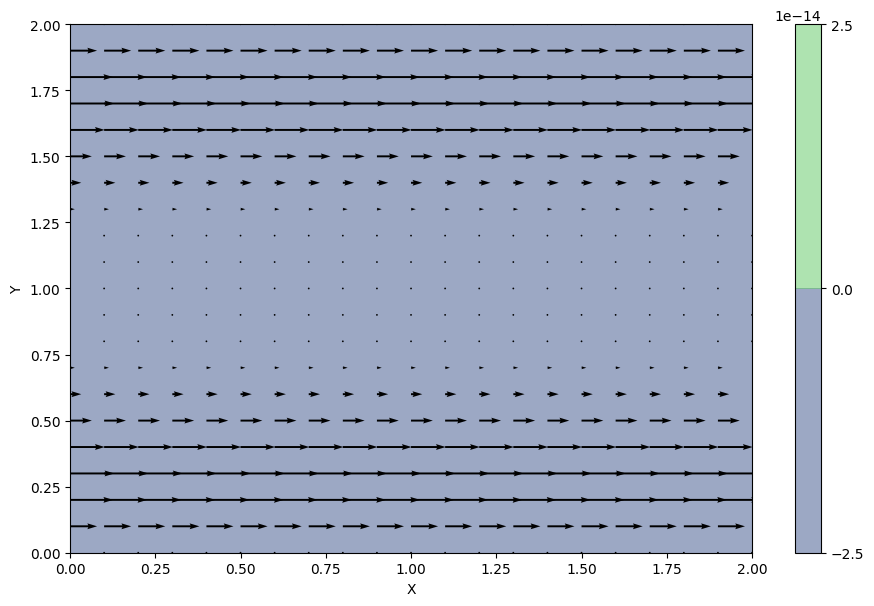

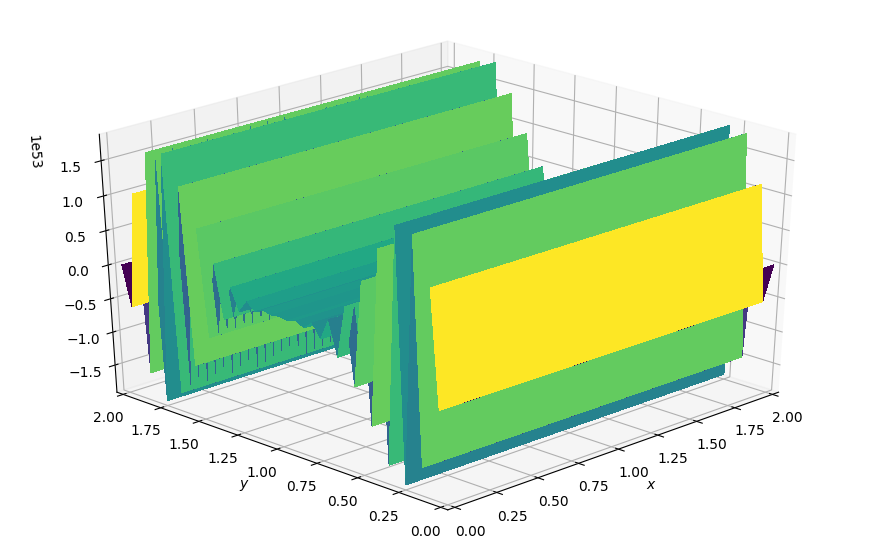

In [0]:
fig = plt.figure(figsize=(11,7), dpi=100)
# plotting the pressure field as a contour
plt.contourf(X, Y, p.transpose(), alpha=0.5, cmap=cm.viridis)  
plt.colorbar()
# plotting the pressure field outlines
plt.contour(X, Y, p.transpose(), cmap=cm.viridis)  
# plotting velocity field
plt.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2].transpose(), v[::2, ::2].transpose()) 
plt.xlabel('X')
plt.ylabel('Y')

plot3D(x,y,u)

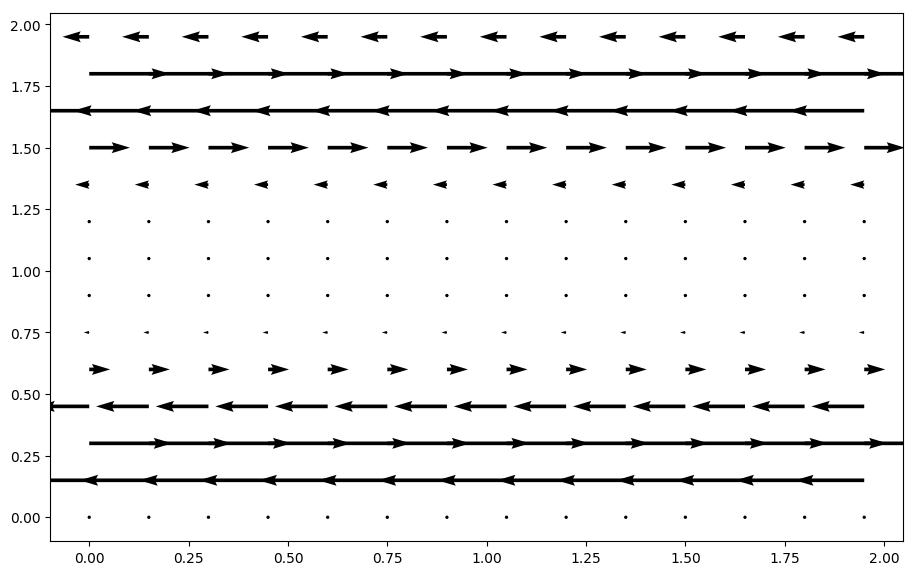

In [0]:
fig = plt.figure(figsize=(11,7), dpi=100)
plt.quiver(X[::3, ::3], Y[::3, ::3], u[::3, ::3].transpose(), v[::3, ::3].transpose()) 